In [1]:
# Import necessary libraries
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

import matplotlib.pyplot as plt

In [2]:
# Read dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Number of rows and columns
X_train.shape

(60000, 28, 28)

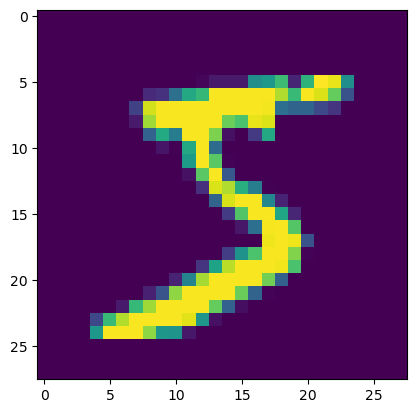

In [4]:
# Visualize the first image
plt.imshow(X_train[0])

In [5]:
# Flatten images into one-dimensional vector
num_pixels = X_train.shape[1] * X_train.shape[2] # Find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # Flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # Flatten test images

In [6]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [7]:
# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


# Build Neural Network

In [8]:
# Define classification model
def classification_model():
    # Create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels, )))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and Test the Network

In [9]:
# Build the model
model = classification_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 8s - loss: 0.1861 - accuracy: 0.9438 - val_loss: 0.1074 - val_accuracy: 0.9678
Epoch 2/10
1875/1875 - 5s - loss: 0.0789 - accuracy: 0.9756 - val_loss: 0.0751 - val_accuracy: 0.9784
Epoch 3/10
1875/1875 - 5s - loss: 0.0545 - accuracy: 0.9827 - val_loss: 0.0694 - val_accuracy: 0.9798
Epoch 4/10
1875/1875 - 5s - loss: 0.0408 - accuracy: 0.9867 - val_loss: 0.0768 - val_accuracy: 0.9776
Epoch 5/10
1875/1875 - 5s - loss: 0.0323 - accuracy: 0.9893 - val_loss: 0.0787 - val_accuracy: 0.9790
Epoch 6/10
1875/1875 - 5s - loss: 0.0261 - accuracy: 0.9912 - val_loss: 0.0885 - val_accuracy: 0.9763
Epoch 7/10
1875/1875 - 6s - loss: 0.0219 - accuracy: 0.9931 - val_loss: 0.0985 - val_accuracy: 0.9763
Epoch 8/10
1875/1875 - 6s - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0962 - val_accuracy: 0.9794
Epoch 9/10
1875/1875 - 6s - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.0993 - val_accuracy: 0.9787
Epoch 10/10
1875/1875 - 6s - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.1239 - 

In [10]:
# Print accuracy
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.9746999740600586% 
 Error: 0.025300025939941406


In [11]:
# Save model after training to avoid retraining
model.save('classification_model.h5')

In [12]:
# Load saved model
from keras.models import load_model
pretrained_model = load_model('classification_model.h5')